In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import _canoeValues as cv

#-----------inputs--------------------
script = "Approximation.ipynb"
inner_file = "Inner Hull.csv"
outer_file = "Outer Hull.csv"
concrete_density = cv.concrete_density # Concrete density = 1200 kg/m^3
#-------------------------------------

script_dir = os.path.abspath('data') # absolute file path in Jupyter

# Read the inner hull coordinates
file_path = os.path.join(script_dir, inner_file) # file path for the text file input
in_coor = pd.read_csv(file_path, header=None)
x_in = in_coor[0]
y_in = in_coor[1]
z_in = in_coor[2]

# Read the outer hull coordinates
file_path = os.path.join(script_dir, outer_file) # file path for the text file input
out_coor = pd.read_csv(file_path, header=None)
x_out = out_coor[0]
y_out = out_coor[1]
z_out = out_coor[2]

# Inner Hull Volume: Assume station is filled up with concrete
station_no = x_in.nunique() # number of stations
station = x_in.unique() # location of each station

# Array of the inner hull volume of each station
vol_in = []

printCrossSectionYIn = []
printCrossSectionZIn = []

# Loop through each station
for k in range(0,station_no-1,1):

    # Coordinates of points in the outer frame sharing an X-coordinate with the current station
    X1_value = station[k]
    Y1 = []
    Z1 = []

    # Coordinates of points in the outer frame sharing an X-coordinate with the next station
    X2_value = station[k+1]
    Y2 = []
    Z2 = []

    # Loop through each x coordinate in the inner hull
    for i in range(0,len(x_in),1):

        # If the coordinate is aligned with the second station on the X-axis, store this XYZ coordinate
        if x_in[i] == X1_value:
            Y1.append(y_in[i])
            Z1.append(z_in[i])
            if k == 24:
                printCrossSectionYIn.append(y_in[i])
                printCrossSectionZIn.append(z_in[i])


        # Otherwise, if the coordinate is aligned with the second station on the X-axis, store this XYZ coordinate
        elif x_in[i] == X2_value:
            Y2.append(y_in[i])
            Z2.append(z_in[i])

    # Calculate the volume of this station
    volume = 0
    # Front of the canoe
    if k == 0:
        l = abs(max(Y2)-min(Y2))
        w = abs(max(Z2)-min(Z2))
        h = abs(X2_value - X1_value)
        volume = l*w*h/3
    # Back of the canoe
    elif k == station_no-2:
        l = abs(max(Y1)-min(Y1))
        w = abs(max(Z1)-min(Z1))
        h = abs(X1_value - X2_value)
        volume = l*w*h/3
    # Any other valid station of the canoe
    elif len(Y1)/2 != 0:
        n = int((len(Y1)-1)/2)
        for j in range(0,n,1):
            area1 = (abs(Y1[j])+abs(Y1[j+1]))*abs(Z1[j]-Z1[j+1])/2*2
            area2 = (abs(Y2[j])+abs(Y2[j+1]))*abs(Z2[j]-Z2[j+1])/2*2
            volume = volume + abs(X1_value - X2_value)*(area1 + area2)/2
        # triangle piece at the bottom
        area1 = abs(Y1[n-1])*abs(Z1[n-1])/2*2
        area2 = abs(Y2[n-1])*abs(Z2[n-1])/2*2
        volume = volume + abs(X1_value - X2_value)*(area1 + area2)/2

    # Append the volume to the array of all station inner hull volumes
    vol_in.append(volume)



print(vol_in)

print(station_no*4)

[319716.0086669726, 1547815.9116029227, 2891961.087221419, 4164854.4824984204, 5314564.810665746, 6371521.795059284, 7357246.307387199, 8282137.759735499, 9150637.003345005, 9964714.027464265, 10725470.004011923, 11433748.94734003, 12090345.45866032, 12696068.119074965, 13251760.57817133, 13758310.263566859, 14216655.42044402, 14627792.821764303, 14992786.257858481, 15312780.021379868, 15589012.743079146, 15822839.119676486, 16015759.03834687, 16169460.37444945, 16285886.877283854, 16367354.402250728, 16416792.604288101, 16438477.830554528, 16438477.830554528, 16416792.604288101, 16367354.402250728, 16285886.877283854, 16169460.37444945, 16015759.03834687, 15822839.119676486, 15589012.743079107, 15312780.021379905, 14992786.257858481, 14627792.821764303, 14216655.42044402, 13758310.26356689, 13251760.578171298, 12696068.119074935, 12090345.458660293, 11433748.947340138, 10725470.004011836, 9964714.027464334, 9150637.003344996, 8282137.759735479, 7357246.307387181, 6371521.795059277, 53

In [2]:
# Outer Hull Volume: Assume station is filled up with concrete
station_no = x_out.nunique() # number of stations
station = x_out.unique() # location of each station

# Array of the outer hull volume of each station
vol_out = []

printCrossSectionYOut = []
printCrossSectionZOut = []

# Loop through each station
for k in range(0,station_no-1,1):

    # Coordinates of points in the outer frame sharing an X-coordinate with the current station
    X1_value = station[k]
    Y1 = []
    Z1 = []

    # Coordinates of points in the outer frame sharing an X-coordinate with the next station
    X2_value = station[k+1]
    Y2 = []
    Z2 = []

    # Loop through each x coordinate in the inner hull
    for i in range(0,len(x_out),1):

        # If the coordinate is aligned with the second station on the X-axis, store this XYZ coordinate
        if x_out[i] == X1_value:
            Y1.append(y_out[i])
            Z1.append(z_out[i])
            if k == 24:
                printCrossSectionYOut.append(y_out[i])
                printCrossSectionZOut.append(z_out[i])

        # Otherwise, if the coordinate is aligned with the second station on the X-axis, store this XYZ coordinate
        elif x_out[i] == X2_value:
            Y2.append(y_out[i])
            Z2.append(z_out[i])
    
    # Calculate the volume of this station
    volume = 0
    # Front of the canoe
    if k == 0:
        l = abs(max(Y2)-min(Y2))
        w = abs(max(Z2)-min(Z2))
        h = abs(X2_value - X1_value)
        volume = l*w*h/3
    # Back of the canoe
    elif k == station_no-2:
        l = abs(max(Y1)-min(Y1))
        w = abs(max(Z1)-min(Z1))
        h = abs(X1_value - X2_value)
        volume = l*w*h/3
    # Any other valid station of the canoe
    elif len(Y1)/2 != 0:
        n = int((len(Y1)-1)/2)
        for j in range(0,n,1):
            area1 = (abs(Y1[j])+abs(Y1[j+1]))*abs(Z1[j]-Z1[j+1])/2*2
            area2 = (abs(Y2[j])+abs(Y2[j+1]))*abs(Z2[j]-Z2[j+1])/2*2
            volume = volume + abs(X1_value - X2_value)*(area1 + area2)/2
        # triangle piece at the bottom
        area1 = abs(Y1[n-1])*abs(Z1[n-1])/2*2
        area2 = abs(Y2[n-1])*abs(Z2[n-1])/2*2
        volume = volume + abs(X1_value - X2_value)*(area1 + area2)/2

    # Append the volume to the array of all station inner hull volumes
    vol_out.append(volume)


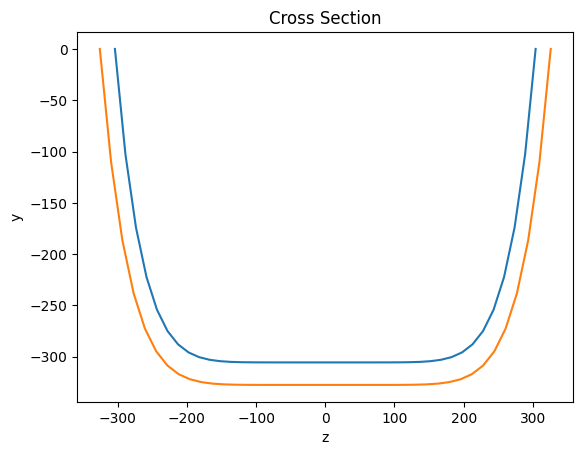

In [3]:
plt.plot(printCrossSectionYIn, printCrossSectionZIn)
plt.plot(printCrossSectionYOut, printCrossSectionZOut)
plt.title('Cross Section')
plt.xlabel('z')
plt.ylabel('y')
plt.show()

In [4]:
# Volume at each station = outer hull volume - inner hull volume
stat_vol = []
for i in range(0,len(vol_in),1):
    stat_vol.append(vol_out[i] - vol_in[i])

# Calculate the mass using the volume at each station
canoe_vol = 0
stat_mass = []
for i in range(0,len(stat_vol),1):
    canoe_vol = canoe_vol + stat_vol[i]
    stat_mass.append(stat_vol[i]/(10**9)*concrete_density)
canoe_m = canoe_vol/(10**9)*concrete_density

print('The mass of canoe is ', canoe_m, ' kg.')

The mass of canoe is  135.14340810215703  kg.


In [5]:
# Calculate Shear Force for Display Case
stand = canoe_m/2 # two stands spaced equally
stand_force = [stand, stand]

length = max(x_out)
stand_po = [length/3, length/3*2]

stat_x = []
for i in range(0,len(station)-1,1):
    stat_x.append((station[i]+station[i+1])/2)

# Calculate the shear force
g = 9.81
x = []
shear = []
# Loop through the length of the canoe
for i in range(0,int(length),1):
    # Append the current distance travelled along the length of the canoe onto x
    x.append(i)

    # Calculate the shear force for this station
    shear_force = 0

    # Loop through each station
    for j in range(0,len(stat_x),1):
        # For each station we have moved past along the length of the canoe, subtract it from the shear force
        if i >= stat_x[j]:
            shear_force += (-1)*stat_mass[j]*g

    # Loop through each stand position
    for k in range(0,len(stand_po),1):
        # For each stand we have moved past along the length of the canoe, add it to the shear force
        if i >= stand_po[k]:
            shear_force += stand_force[k]*g

    # Append the shear force summed at this length along the canoe
    shear.append(shear_force)

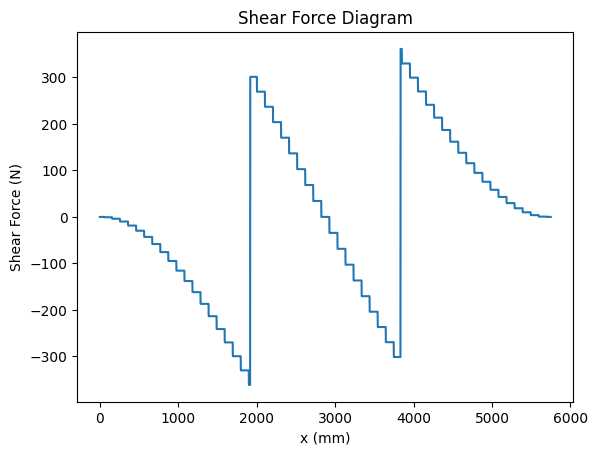

In [6]:
# Plot Shear Force Diagram
plt.plot(x,shear)
plt.title('Shear Force Diagram')
plt.xlabel('x (mm)')
plt.ylabel('Shear Force (N)')
plt.show()

distToNextStation = [j-i for i, j in zip(station[:-1], station[1:])]

# Track mm distance of station for paddler positions
mm_traveled = 0

Station_by_length = []

for i in range(0, len(station)-1):

    delta_mm_traveled = mm_traveled + float(distToNextStation[i])

    # Any distance between the distance travlled (rounded) and the new distance travelled (larger due to more paddlers) (also rounded) will be saved. Anything else is discarded
    for j in range(round(mm_traveled), round(delta_mm_traveled)):
        Station_by_length.append(i)

    mm_traveled = delta_mm_traveled


# Export points to csv file:
df1 = pd.DataFrame(data={'Station': Station_by_length, 'Length': x, 'Shear': shear})

csv_file = 'Length_vs_Shear_Display_Stand.csv'
script_dir = os.path.abspath('data')
file_path = os.path.join(script_dir, csv_file)
df1.to_csv(file_path, index=False)

In [7]:
# Calculate Bending Moment for Display Case
moment = []
moment.append(0)
bending_moment = 0
# Loop through the length of the canoe
for i in range(0,len(x)-1,1):
    # Calculate bending moment using shear
    bending_moment += (x[i+1]-x[i])*shear[i+1]/1000
    moment.append(bending_moment)
    

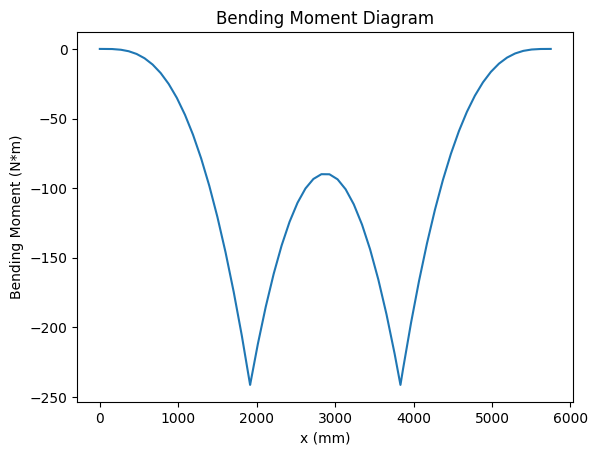

In [8]:
# Plot Bending Moment Diagram
plt.plot(x,moment)
plt.title('Bending Moment Diagram')
plt.xlabel('x (mm)')
plt.ylabel('Bending Moment (N*m)')
plt.show()

# Export points to csv file:
df1 = pd.DataFrame(data={'Station': Station_by_length, 'Length': x, 'Moment': moment})

csv_file = 'Length_vs_Moment_Display_Stand.csv'
script_dir = os.path.abspath('data')
file_path = os.path.join(script_dir, csv_file)
df1.to_csv(file_path, index=False)

In [9]:
# Export the section volume, section weight, shear force, and bending moment to Station Information
stat_weight = []
for i in range(0,len(stat_vol),1):
    station_weight = stat_mass[i]*g
    stat_weight.append(station_weight)

stat_no = np.arange(1, len(stat_vol)+1, 1)

width = []

for k in range(0,len(stat_no)-1,1):
    X1_value = station[k]
    Y1 = []

    for i in range(0,len(x_out),1):
        if x_out[i] == X1_value:
            Y1.append(y_out[i])

    width.append(max(Y1) - min(Y1))

width.append(0)

df1 = pd.DataFrame(data={'Station Number': stat_no, 'Volume (m^3)': stat_vol, 'Mass (kg)': stat_mass, 'Weight (N)': stat_weight, 'Distance to Next Station (mm)': distToNextStation, 'Width (mm)': width})
df1['Volume (m^3)'] = df1['Volume (m^3)']/(10**9)

csv_file = 'Station Information.csv'
script_dir = os.path.abspath('data')
file_path = os.path.join(script_dir, csv_file)
df1.to_csv(file_path, index=False)

In [10]:
max(shear)

361.43348897797546

In [11]:
min(shear)

-361.43348897797586

In [12]:
np.sum(shear)

7.275957614183426e-11

In [13]:
# Export Display Stand Shear Force and Bending Moment to CSV files
titles = ['Positive Shear [N]', 'Negative Shear [N]', 'Positive Bending Moment [Nm]', 'Negative Bending Moment [Nm]', 'Moment at the end [Nm]']
values = [max(shear), min(shear), max(moment), min(moment), moment[len(moment)-1]]
station_no = []
max_width = []
max_depth = []
station_t = [] # Station thickness

for value in [max(shear), min(shear)]:
    shear_index = shear.index(value)
    xshear = x[shear_index]
    for i in range(0,len(station)-1,1):
        if (xshear >= station[i] and xshear < station[i+1]):
            station_index = i+1

    X1_value = station[station_index-1]
    X2_value = station[station_index]
    Y1 = []
    Y2 = []
    Z1 = []
    Z2 = []        
    for i in range(0,len(y_out),1):
        if x_out[i] == X1_value:
            Y1.append(y_out[i])
            Z1.append(z_out[i])
        elif x_out[i] == X2_value:
            Y2.append(y_out[i])
            Z2.append(z_out[i])
    width = (max(Y1)-min(Y1)+max(Y2)-min(Y2))/2
    depth = (abs(min(Z1))+abs(min(Z2)))/2
    max_width.append(width)
    max_depth.append(depth)
    station_no.append(station_index)
    station_t.append(abs(X2_value - X1_value))

for value in [max(moment), min(moment)]:
    moment_index = moment.index(value)
    xmoment = x[moment_index]
    for i in range(0,len(station)-1,1):
        if (xmoment >= station[i] and xmoment < station[i+1]):
            station_index = i+1

    X1_value = station[station_index-1]
    X2_value = station[station_index]
    Y1 = []
    Y2 = []
    Z1 = []
    Z2 = []        
    for i in range(0,len(y_out),1):
        if x_out[i] == X1_value:
            Y1.append(y_out[i])
            Z1.append(z_out[i])
        elif x_out[i] == X2_value:
            Y2.append(y_out[i])
            Z2.append(z_out[i])
    width = (max(Y1)-min(Y1)+max(Y2)-min(Y2))/2
    depth = (abs(min(Z1))+abs(min(Z2)))/2
    max_width.append(width)
    max_depth.append(depth)
    station_no.append(station_index)
    station_t.append(abs(X2_value - X1_value))
    
station_no.append(len(station)-1)  
max_width.append('')
max_depth.append('')
station_t.append('')

df1 = pd.DataFrame(data={'': titles, 'Value': values, 'Station No': station_no, 'Max Width [mm]': max_width, 'Max Depth [mm]': max_depth, 'Station Thickness [mm]': station_t})

csv_file = 'Shear_and_Moment_Display_Stand.csv'
script_dir = os.path.abspath('data')
file_path = os.path.join(script_dir, csv_file)
df1.to_csv(file_path, index=False)